In [5]:
from DenoiseST import DenoiseST
import os
import torch
import pandas as pd
import numpy as np
import scanpy as sc
from sklearn import metrics
import multiprocessing as mp

In [ ]:
device = torch.device('cuda:2' if torch.cuda.is_available() else 'cpu')

n_clusters = 7

#file_fold = './Mouse_Brain/' #please replace 'file_fold' with the download path
file_fold = '/home/cuiyaxuan/spatialLIBD/5.Mouse_Olfactory/'
#adata = sc.read_h5ad(file_fold + 'mouse_anterior_posterior_brain_merged.h5ad')
adata = sc.read_h5ad(file_fold + 'filtered_feature_bc_matrix.h5ad')
adata.var_names_make_unique()


model = DenoiseST(adata,device=device,n_top_genes=4096)
adata = model.train()

In [ ]:
from repair_model import main_repair
df=pd.DataFrame(adata.obsm['emb'])
main_repair(adata,df,device)

In [ ]:
csv_file = "example.csv"
data_df = pd.read_csv(csv_file, header=None)
data_df = data_df.values
adata.obsm['emb'] = data_df

In [ ]:
from utils import clustering

radius = 50
tool = 'mclust' # mclust, leiden, and louvain
if tool == 'mclust':
   clustering(adata, n_clusters, radius=radius, method=tool, refinement=True)
elif tool in ['leiden', 'louvain']:
   clustering(adata, n_clusters, radius=radius, method=tool, start=0.1, end=2.0, increment=0.01, refinement=False)

df=adata.obs['domain']
df.to_csv("label_MO.csv")

#cells after MT filter: 19109


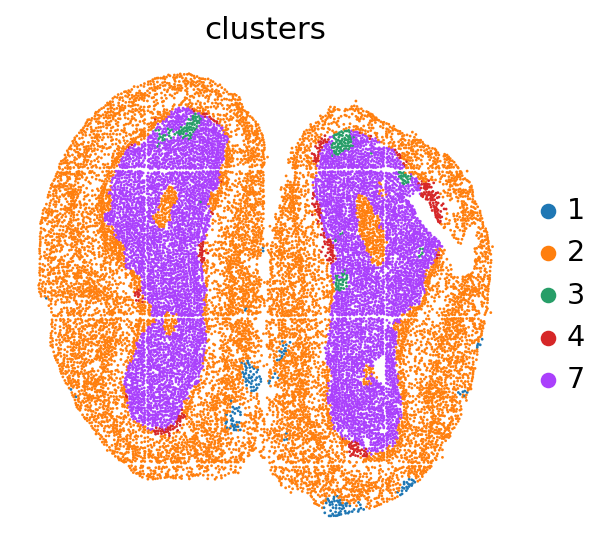

In [6]:
import matplotlib as mpl
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import visual_high
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams["font.sans-serif"] = "Arial"
warnings.filterwarnings('ignore')
file_fold = '/home/cuiyaxuan/spatialLIBD/5.Mouse_Olfactory/'
#adata = sc.read_h5ad(file_fold + 'mouse_anterior_posterior_brain_merged.h5ad')
adata = sc.read_h5ad(file_fold + 'filtered_feature_bc_matrix.h5ad')
df_label=pd.read_csv('/home/cuiyaxuan/DiffusionST/Diffusion_MO_7/label_MO.csv', index_col=0) 
#df_label=pd.read_csv('./label_5000.csv', index_col=0) ##If the dropout rate is less than 0.85, visualize the data using "label_5000.csv".
visual_high.visual(adata,df_label)